<a href="https://colab.research.google.com/github/riddhigarg2605/Network-traffic-analysis-using-ML/blob/main/Network_Intrusion_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Network intrusion dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving intrusion.csv to intrusion.csv


In [ ]:
import io
import pandas as pd
intrusion = pd.read_csv(io.BytesIO(uploaded['intrusion.csv']))
intrusion.head()

,Unnamed: 0,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,check
0,1,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,2,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,4,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,5,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [ ]:
import matplotlib.pyplot as plt

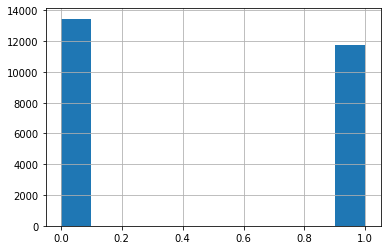

In [ ]:
intrusion['check'].hist()
plt.rcParams['figure.figsize'] = (6, 4)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(intrusion.drop(labels=['check'], axis=1),
    intrusion['check'],
    test_size=0.3)

# Mutual Info

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determining the mutual information for train
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00000000e+00, 3.06934958e-02, 5.64632344e-01, 4.38784833e-01,
       0.00000000e+00, 9.34407967e-03, 0.00000000e+00, 8.86052670e-03,
       5.43706984e-04, 2.85406695e-01, 4.97426367e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.00134134e-03, 8.40716962e-04, 5.36150348e-03, 3.20474961e-03,
       2.66383459e-01, 6.76907272e-02, 2.73059989e-01, 2.60855919e-01,
       3.85707921e-02, 2.65957036e-02, 3.53405423e-01, 3.56784568e-01,
       9.74022974e-02, 1.37685545e-01, 3.27068229e-01, 3.02522307e-01,
       2.87036927e-01, 1.28460754e-01, 1.87619655e-01, 2.80097205e-01,
       2.74634456e-01, 3.66298469e-02, 6.27218022e-02])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes                      0.564632
dst_bytes                      0.438785
diff_srv_rate                  0.356785
same_srv_rate                  0.353405
dst_host_srv_count             0.327068
dst_host_same_srv_rate         0.302522
dst_host_diff_srv_rate         0.287037
logged_in                      0.285407
dst_host_serror_rate           0.280097
dst_host_srv_serror_rate       0.274634
serror_rate                    0.273060
count                          0.266383
srv_serror_rate                0.260856
dst_host_srv_diff_host_rate    0.187620
dst_host_count                 0.137686
dst_host_same_src_port_rate    0.128461
srv_diff_host_rate             0.097402
srv_count                      0.067691
dst_host_srv_rerror_rate       0.062722
rerror_rate                    0.038571
dst_host_rerror_rate           0.036630
duration                       0.030693
srv_rerror_rate                0.026596
wrong_fragment                 0.009344
hot                            0.008861


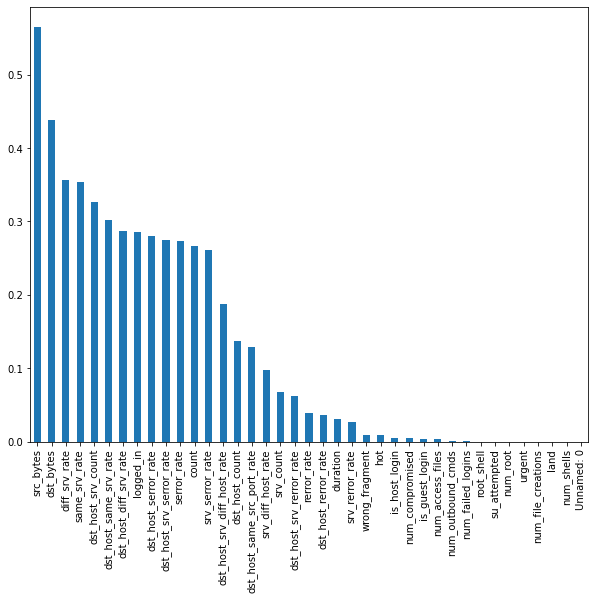

In [ ]:
#plot of mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(10, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#selecting the top 10 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train = X_train[X_train.columns[sel_five_cols.get_support()]]

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determining the mutual information
mutual_info = mutual_info_classif(X_test, y_test)
mutual_info

array([0.        , 0.02213377, 0.55715512, 0.43117772, 0.00121668,
       0.0081327 , 0.00132553, 0.01721449, 0.00072354, 0.26954608,
       0.0009713 , 0.00145894, 0.        , 0.00158353, 0.        ,
       0.00852369, 0.00178058, 0.        , 0.00110908, 0.        ,
       0.25718599, 0.06391299, 0.27086057, 0.26792955, 0.02887392,
       0.0425639 , 0.35636451, 0.36581533, 0.08800448, 0.12644434,
       0.33212501, 0.30451753, 0.28883227, 0.13705953, 0.18571514,
       0.26771672, 0.2785527 , 0.03571174, 0.06141443])

In [ ]:
x_train.columns

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state = 10)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
acc0 = accuracy_score(y_test, y_pred_dt)
acc0 = acc0*100
print('Accuracy: %.3f' % acc0)

Accuracy: 99.378


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4059
           1       0.99      0.99      0.99      3499

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [ ]:
confusion_matrix(y_test,y_pred_dt)

array([[4038,   21],
       [  26, 3473]])

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.svm import SVC

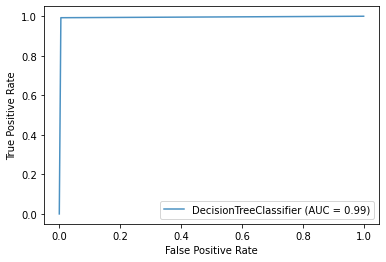

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(dt, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
yhat = model.predict(X_test)
yhat

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
acc = accuracy_score(y_test, yhat)
acc = acc*100
print('Accuracy: %.3f' % acc)

Accuracy: 99.550


In [ ]:
confusion_matrix(y_test,yhat)

array([[4047,   12],
       [  22, 3477]])

In [ ]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4059
           1       1.00      0.99      1.00      3499

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      1.00      1.00      7558



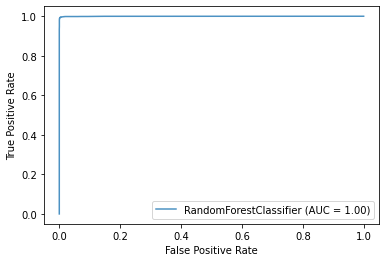

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# k-nn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4059
           1       0.95      0.96      0.95      3499

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558



In [ ]:
confusion_matrix(y_test,y_pred)

array([[3868,  191],
       [ 138, 3361]])

In [ ]:
accuracy_score(y_test, y_pred)
acc2 = accuracy_score(y_test, y_pred)
acc2 = acc2*100
print('Accuracy: %.3f' % acc2)

Accuracy: 95.647


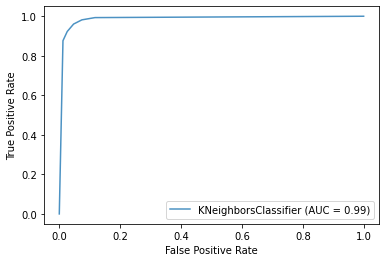

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
svm = svm.SVC(kernel = 'rbf', C = 5)
svm = svm.fit(X_train,y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      4059
           1       0.94      0.91      0.92      3499

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558



In [ ]:
confusion_matrix(y_test,y_pred_svm)

array([[3852,  207],
       [ 314, 3185]])

In [ ]:
accuracy_score(y_test, y_pred_svm)
acc3 = accuracy_score(y_test, y_pred_svm)
acc3 = acc3*100
print('Accuracy: %.3f' % acc3)

Accuracy: 93.107


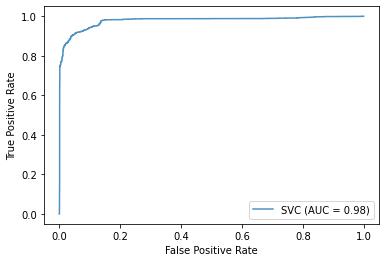

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(svm, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state = 0)

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr = lr.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4059
           1       0.90      0.87      0.89      3499

    accuracy                           0.90      7558
   macro avg       0.90      0.89      0.90      7558
weighted avg       0.90      0.90      0.90      7558



In [ ]:
confusion_matrix(y_test,y_pred_lr)

array([[3736,  323],
       [ 462, 3037]])

In [ ]:
accuracy_score(y_test, y_pred_lr)
acc4 = accuracy_score(y_test, y_pred_lr)
acc4 = acc4*100
print('Accuracy: %.3f' % acc4)

Accuracy: 89.614


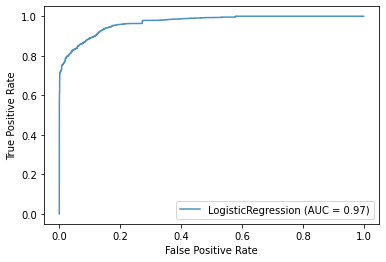

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(lr, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = xgb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4059
           1       0.99      0.98      0.99      3499

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



In [ ]:
confusion_matrix(y_test,y_pred_xgb)

array([[4034,   25],
       [  53, 3446]])

In [ ]:
accuracy_score(y_test, y_pred_xgb)
acc5 = accuracy_score(y_test, y_pred_xgb)
acc5 = acc5*100
print('Accuracy: %.3f' % acc5)

Accuracy: 98.968


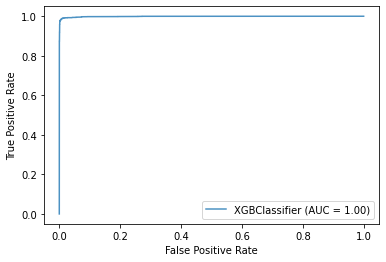

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(xgb, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb= GaussianNB(var_smoothing = 10)
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=10)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4059
           1       0.95      0.79      0.86      3499

    accuracy                           0.88      7558
   macro avg       0.90      0.88      0.88      7558
weighted avg       0.89      0.88      0.88      7558



In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[3927,  132],
       [ 749, 2750]])

In [ ]:
accuracy_score(y_test, y_pred_nb)
acc6 = accuracy_score(y_test, y_pred_nb)
acc6 = acc6*100
print('Accuracy: %.3f' % acc6)

Accuracy: 88.343


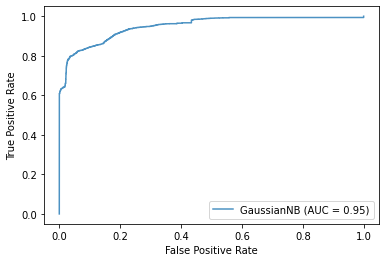

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(nb, X_test, y_test, ax=ax, alpha=0.8)
#svc_disp.plot(ax=ax, alpha=0.8)
plt.show()